In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
tokenizer = Tokenizer()

data = open('../Datasets/lyrics.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


dle': 1449, 'brain': 1450, 'ringin': 1451, 'glamour': 1452, 'gas': 1453, 'guff': 1454, 'whisper': 1455, 'oil': 1456, 'remarkable': 1457, 'policeman': 1458, 'bluff': 1459, 'maintain': 1460, 'guril': 1461, 'sic': 1462, 'passage': 1463, 'rough': 1464, 'borne': 1465, 'breeze': 1466, 'boundless': 1467, 'stupendous': 1468, 'roll': 1469, 'thundering': 1470, 'motion': 1471, 'mermaids': 1472, 'fierce': 1473, 'tempest': 1474, 'gathers': 1475, 'oneill': 1476, 'odonnell': 1477, 'lucan': 1478, 'oconnell': 1479, 'brian': 1480, 'drove': 1481, 'danes': 1482, 'patrick': 1483, 'vermin': 1484, 'whose': 1485, 'benburb': 1486, 'blackwater': 1487, 'owen': 1488, 'roe': 1489, 'munroe': 1490, 'lambs': 1491, 'skip': 1492, 'views': 1493, 'enchanting': 1494, 'rostrevor': 1495, 'groves': 1496, 'lakes': 1497, 'ride': 1498, 'tide': 1499, 'majestic': 1500, 'shannon': 1501, 'sail': 1502, 'loch': 1503, 'neagh': 1504, 'ross': 1505, 'gorey': 1506, 'saxon': 1507, 'tory': 1508, 'soil': 1509, 'sanctified': 1510, 'enemies': 

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [6]:
print(tokenizer.word_index)

, 'addle': 1449, 'brain': 1450, 'ringin': 1451, 'glamour': 1452, 'gas': 1453, 'guff': 1454, 'whisper': 1455, 'oil': 1456, 'remarkable': 1457, 'policeman': 1458, 'bluff': 1459, 'maintain': 1460, 'guril': 1461, 'sic': 1462, 'passage': 1463, 'rough': 1464, 'borne': 1465, 'breeze': 1466, 'boundless': 1467, 'stupendous': 1468, 'roll': 1469, 'thundering': 1470, 'motion': 1471, 'mermaids': 1472, 'fierce': 1473, 'tempest': 1474, 'gathers': 1475, 'oneill': 1476, 'odonnell': 1477, 'lucan': 1478, 'oconnell': 1479, 'brian': 1480, 'drove': 1481, 'danes': 1482, 'patrick': 1483, 'vermin': 1484, 'whose': 1485, 'benburb': 1486, 'blackwater': 1487, 'owen': 1488, 'roe': 1489, 'munroe': 1490, 'lambs': 1491, 'skip': 1492, 'views': 1493, 'enchanting': 1494, 'rostrevor': 1495, 'groves': 1496, 'lakes': 1497, 'ride': 1498, 'tide': 1499, 'majestic': 1500, 'shannon': 1501, 'sail': 1502, 'loch': 1503, 'neagh': 1504, 'ross': 1505, 'gorey': 1506, 'saxon': 1507, 'tory': 1508, 'soil': 1509, 'sanctified': 1510, 'enemi

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 [==============================] - 17s 44ms/step - loss: 6.6973 - accuracy: 0.0701
Epoch 2/100
377/377 [==============================] - 19s 51ms/step - loss: 5.7973 - accuracy: 0.1100
Epoch 3/100
377/377 [==============================] - 17s 45ms/step - loss: 4.9401 - accuracy: 0.1625
Epoch 4/100
377/377 [==============================] - 17s 44ms/step - loss: 4.0361 - accuracy: 0.2255
Epoch 5/100
377/377 [==============================] - 19s 49ms/step - loss: 3.1494 - accuracy: 0.3317
Epoch 6/100
377/377 [==============================] - 18s 48ms/step - loss: 2.4144 - accuracy: 0.4492
Epoch 7/100
377/377 [==============================] - 18s 47ms/step - loss: 1.8886 - accuracy: 0.5630
Epoch 8/100
377/377 [==============================] - 17s 45ms/step - loss: 1.5498 - accuracy: 0.6334
Epoch 9/100
377/377 [==============================] - 19s 51ms/step - loss: 1.2905 - accuracy: 0.6955
Epoch 10/100
377/377 [==============================] - 21s 56ms/step - l

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

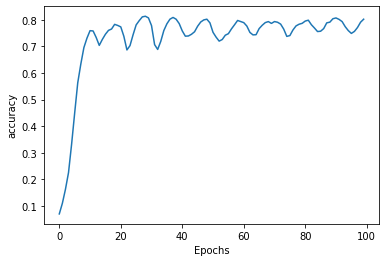

In [9]:
plot_graphs(history, 'accuracy')


In [10]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this maiden move for paddy dear in a man there i love but theres more there i love my is gone drown in the love in gone crystal i love i love right i gone more gone crystal fountain my caubeen now as did gone up and now on right i right more in your eyes leave gone too late i should my eyes for his honor more always there here town when once more love gone crystal fountain your babes tree i meaning when right i gone i go down soul right your men of love grows my breast for
